In [2]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [60]:
def get(data,index):
    l = []
    for d in data:
        l.append(d[index])
    return l

def normalize(vs):
    minb = min(B)
    maxb = max(B)
    l = []
    for v in vs:
        l.append((v-minb)/(maxb-minb))
    return np.array(l)
import json

def load(filepath):
    with open(filepath,'r') as fh:
        obj = json.loads(fh.read())
    dataset = {}
    for idx,cat in enumerate(obj['groups']['values']):
        key = str(cat)
        if not key in dataset:
            dataset[key] = {"X":[],"D":[],"B":[],"N":[]}
    
        pars = dict(zip(obj['params']['fields'], \
                           obj['params']['values'][idx]))
        expect = dict(zip(obj['expected']['fields'], \
                        obj['expected']['values'][idx]))
        meas = dict(zip(obj['observed']['fields'], \
                        obj['observed']['values'][idx]))
        
        dataset[key]['X'].append(list(pars.values()))
        dataset[key]['D'].append(expect['output'])
        dataset[key]['B'].append(meas['bias'])
        dataset[key]['N'].append(meas['noise'])
        print(meas['bias'],expect['output'])
    return dataset


In [61]:
filepath = "../../outputs/datasets/integ_0_3_0_0.json"
dataset = load(filepath)

(0.0005639648879878223, 0.0)
(0.004753417335450649, 0.0)
(-0.9981469511985779, 0.0)
(0.0017724611097946763, 0.0)
(0.006606445647776127, 0.0)
(-0.9087988138198853, 0.10000000149011612)
(-0.0008862304384820163, 0.0)
(0.0033837887458503246, 0.0)
(-0.8084130883216858, 0.20000000298023224)
(0.0010473632719367743, 0.0)
(0.00604248046875, 0.0)
(-0.7102832198143005, 0.30000001192092896)
(-0.0015307615976780653, 0.0)
(0.004833984188735485, 0.0)
(-0.6101391315460205, 0.4000000059604645)
(-0.0012084960471838713, 0.0)
(0.003464355366304517, 0.0)
(-0.5083032846450806, 0.5)
(-0.0012084960471838713, 0.0)
(0.003706054762005806, 0.0)
(-0.4062255620956421, 0.6000000238418579)
(0.0009667968261055648, 0.0)
(0.006928711198270321, 0.0)
(-0.30745118856430054, 0.699999988079071)
(0.0006445312174037099, 0.0)
(0.006606444716453552, 0.0)
(-0.010725021362304688, 0.800000011920929)
(0.0008056640508584678, 0.0)
(0.005478515289723873, 0.0)
(-0.017814934253692627, 0.8999999761581421)
(8.056640217546374e-05, 0.0)
(0.0

[u'pos', u'pos', u'medium', u'medium', u'out0']
num els=22


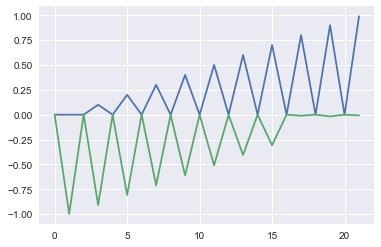

In [62]:
k = list(dataset.keys())[1]
print(k)
X = dataset[k]['X']
D = dataset[k]['D']
B = dataset[k]['B']
n = len(B)
print("num els=%d" % n)
plt.plot(D)
plt.plot(B)

[u'pos', u'pos', u'medium', u'medium', u'in0']


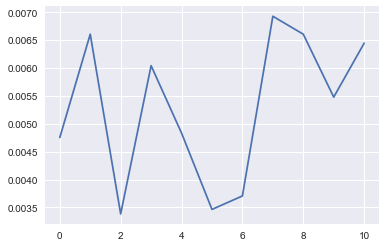

In [43]:
k2 = list(dataset.keys())[0]
print(k2)
B_in = dataset[k2]['B']
plt.plot(B_in)

In [44]:
#targ = np.array(list(map(lambda i: D[i], range(n))))
targ = np.array(list(map(lambda i: X[i][0], range(n))))
bias = np.array(B)
meas = np.array(list(map(lambda i: B[i]+targ[i], range(n))))
print("targ: [%f,%f]" % (min(targ),max(targ)))
print("bias: [%f,%f]" % (min(bias),max(bias)))
print("meas: [%f,%f]" % (min(meas),max(meas)))

targ: [0.000000,0.990000]
bias: [-0.998147,0.001772]
meas: [-0.998147,0.990081]


In [45]:
def nonlin_fit(xdata,a,b):
    x = xdata
    result = (a)*(x) + b
    return result

In [50]:
(a,b),corrs = scipy.optimize.curve_fit(nonlin_fit, targ, bias)
print(a,b)

(0.54456363554477516, -0.51235194602648937)


In [51]:
def predict(v):
    return a*v + b

In [52]:
pred = list(map(lambda i: predict(targ[i]) - targ[i], range(n)))

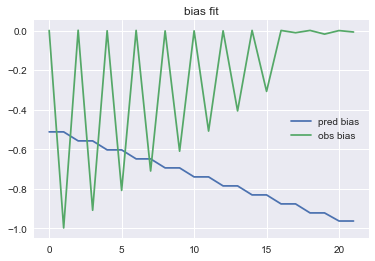

In [53]:
plt.plot(pred,label='pred bias')
plt.plot(bias,label='obs bias')
plt.title("bias fit")
plt.legend()

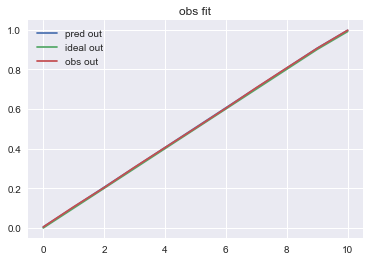

In [35]:
plt.plot(pred+targ,label='pred out')
plt.plot(targ,label='ideal out')
plt.plot(meas,label='obs out')
plt.title("obs fit")
plt.legend()